In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 10 #

### The Monty Hall Problem ###

In [2]:
goats = make_array('first goat', 'second goat')

In [3]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [4]:
other_goat('first goat'), other_goat('second goat'), other_goat('truck')

('second goat', 'first goat', None)

In [5]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [6]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [7]:
monty_hall_game()

['second goat', 'first goat', 'car']

In [8]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())


In [9]:
games.show(3)

Guess,Revealed,Remaining
car,second goat,first goat
second goat,first goat,car
first goat,second goat,car


In [10]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3327
first goat,3356
second goat,3317


In [11]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6673
first goat,1688
second goat,1639


In [12]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3327,6673
first goat,3356,1688
second goat,3317,1639


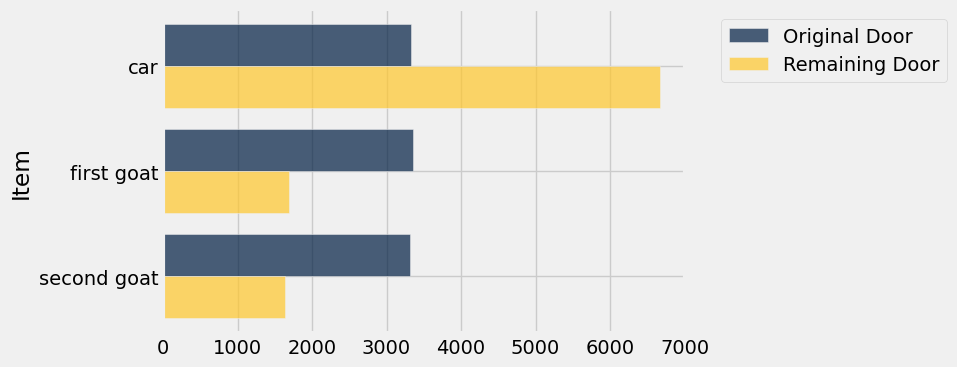

In [13]:
combined.barh(0)

## Optional Problems

Consider an autonomous vehicle using cameras to detect pedestrians. Each ride there is a 1% chance of cameras failing. Provided that you own a car and you take your car out for 3 rides. 
- Your camera failed on the first ride. What is the probability that your cameras fail on the 2nd ride?
What is the probability:
- you have 1, 2 or 3 rides with camera failures
- you have 1 ride with camera failures?


In [8]:
def failure_simulation():
    results = make_array()
    for i in np.arange(3):
        result = np.random.choice(['Failure', 'No Failure'], p = [0.01, 0.99])
        results = np.append(results, result)
    return results

## (A) $$P(Camera\:failure\:on\:the\:2nd\:ride)$$

In [51]:
calculation = ...

0.0107


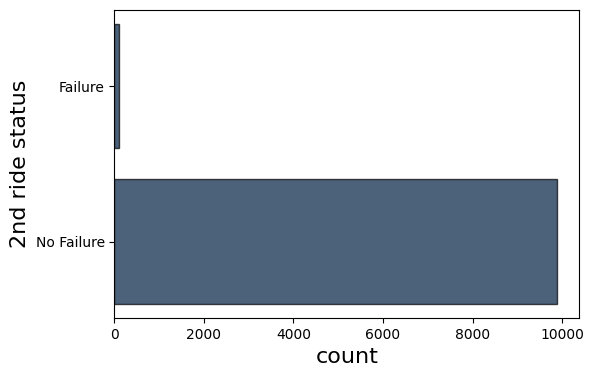

In [52]:
items = make_array()
for i in np.arange(10000):
    status_on_2nd = failure_simulation().item(1)
    items = np.append(items, status_on_2nd)
tbl = Table().with_column('2nd ride status', items).group('2nd ride status')
tbl.barh('2nd ride status')
print(np.mean(items == 'Failure'))

## (B) $$P(More\:than\:1\:camera\:failure)$$

In [42]:
calculation_b = ...

0.0002


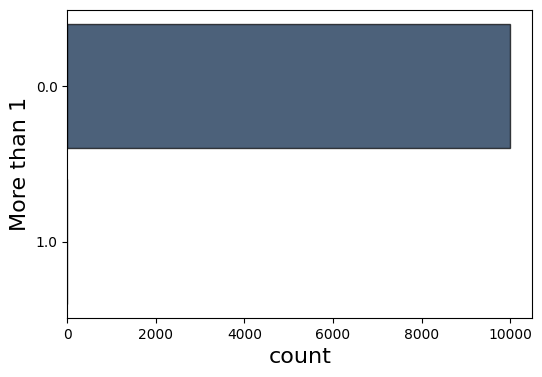

In [50]:
items_b = make_array()
for i in np.arange(10000):
    more_than_1_failure = sum(failure_simulation() == 'Failure') > 1
    items_b = np.append(items_b, more_than_1_failure)
tbl = Table().with_column('More than 1', items_b).group('More than 1')
tbl.barh('More than 1')
print(np.mean(items))

## (B) $$P(1\:camera\:failure)$$

In [42]:
calculation_c = ...

0.0304


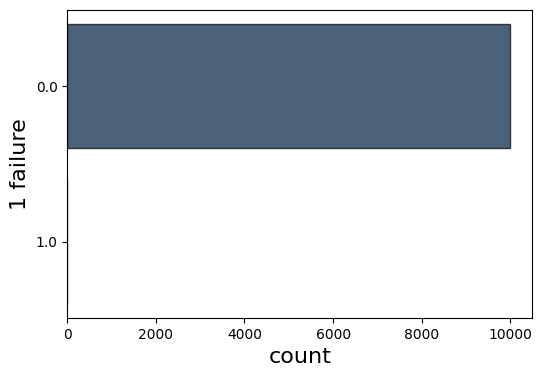

In [47]:
items_c = make_array()
for i in np.arange(10000):
    one_failure = sum(failure_simulation() == 'Failure') == 1
    items_c = np.append(items_c, one_failure)
tbl = Table().with_column('1 failure', items_b).group('1 failure')
tbl.barh('1 failure')
print(np.mean(items_c))